In [ ]:
Somayeh Amraee  _ Regression

#1.Loading dataset

##Import Libararies

In [ ]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


##Reading initial transaction data file: transactions_0.csv

In [ ]:
file_path ='/content/sample_data/file/transactions_0.csv'
df_init = pd.read_csv(file_path, sep='|')

##Concatenating Multiple Dataframes in a Loop

In [ ]:
for i in range(1,132):
  df_latter =pd.read_csv(f'/content/sample_data/file/transactions_{i}.csv', sep='|')
  df_init =pd.concat([df_init, df_latter], axis = 0)

In [ ]:
df_init.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434


In [ ]:
df_transaction =df_init.copy()
df_transaction

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...
32667,2704390552958068,756767582811,1f091e64bd3f2382b3a4f90889329c32,1662431076,health_fitness,8.21,0,Anderson-King,33.831954,-116.587500
32668,2704390552958068,756767582811,971aa63530f8f8fb1de28472e6aa53bc,1665826484,home,4.79,0,"Vang, Higgins and Decker",33.591525,-117.962834
32669,2704390552958068,756767582811,555941e364d1f591a6ae4088557f8ed3,1662292853,health_fitness,1.99,0,Ibarra LLC,34.370334,-117.628700
32670,2704390552958068,756767582811,b756330bb5da439e28412f40e7a5f9e3,1670561624,personal_care,6.64,0,"Casey, Gonzales and Mueller",33.690374,-117.301976


##Loading Customers Data from CSV File

In [ ]:
file_path ='/content/sample_data/file/customers.csv'
df_customers =pd.read_csv(file_path, sep='|')
df_customers

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,392-96-7670,30125158904184,Sarah,Martin,F,1666 Jenna Unions,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31,201218361926
996,594-17-7993,180047909863618,Erin,Wells,F,444 Alexis Estate Suite 824,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,1982-05-27,921460407733
997,196-93-1156,4371450311809,Michael,James,M,914 Cassandra Gateway Suite 061,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14,499348764671
998,895-65-9304,3519925692476886,Michael,Lewis,M,34141 Katelyn Path,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23,617852071065


##Merging DataFrames based on a Common Column

In [ ]:
merged_df =pd.merge(df_transaction, df_customers, on='cc_num', how='inner')

In [ ]:
merged_df

,cc_num,acct_num_x,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,street,city,state,zip,lat,long,city_pop,job,dob,acct_num_y
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,...,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,...,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,...,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,...,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,...,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,2704390552958068,756767582811,1f091e64bd3f2382b3a4f90889329c32,1662431076,health_fitness,8.21,0,Anderson-King,33.831954,-116.587500,...,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09,756767582811
4260900,2704390552958068,756767582811,971aa63530f8f8fb1de28472e6aa53bc,1665826484,home,4.79,0,"Vang, Higgins and Decker",33.591525,-117.962834,...,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09,756767582811
4260901,2704390552958068,756767582811,555941e364d1f591a6ae4088557f8ed3,1662292853,health_fitness,1.99,0,Ibarra LLC,34.370334,-117.628700,...,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09,756767582811
4260902,2704390552958068,756767582811,b756330bb5da439e28412f40e7a5f9e3,1670561624,personal_care,6.64,0,"Casey, Gonzales and Mueller",33.690374,-117.301976,...,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09,756767582811


#2.Data preparation

##Missing Values in DataFrame

In [ ]:
merged_df.isnull().sum()

cc_num        0
acct_num_x    0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
ssn           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num_y    0
dtype: int64

In [ ]:
merged_df.shape

(4260904, 24)

In [ ]:
print(merged_df.columns)

Index(['cc_num', 'acct_num_x', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'first',
       'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'acct_num_y'],
      dtype='object')


##To determine the time period of the data collection based on the 'unix_time' column

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame called 'data'
# Replace 'unix_time' with the actual column name in your dataset

# Convert the 'unix_time' column to pandas datetime format
merged_df['unix_time'] = pd.to_datetime(merged_df['unix_time'], unit='s')

# Find the minimum and maximum dates
min_date = merged_df['unix_time'].min()
max_date = merged_df['unix_time'].max()

# Print the time period of the data collection
print("Data collection period:")
print("Start date:", min_date)
print("End date:", max_date)


Data collection period:
Start date: 1970-01-01 04:33:00
End date: 2022-12-31 12:59:42


In [ ]:
unique_categories = merged_df['category'].unique()
print(unique_categories)


['gas_transport' 'grocery_pos' 'misc_net' 'misc_pos' 'entertainment'
 'food_dining' 'shopping_pos' 'shopping_net' 'grocery_net' 'personal_care'
 'health_fitness' 'travel' 'home' 'kids_pets']


In [ ]:

unique_merchant = merged_df['merchant'].unique()
print(unique_merchant)

['Phillips Group' 'Tucker Ltd' 'Dixon PLC' ... 'Holden, Hodge and Yu'
 'Duran PLC' 'Robertson, Horton and Smith']


In [ ]:
unique_first = merged_df['first'].unique()
print(unique_first)

['Jonathan' 'Brandon' 'Joseph' 'Michael' 'Jeffrey' 'Juan' 'Kevin'
 'Richard' 'Stuart' 'Ryan' 'Jason' 'Paul' 'Thomas' 'Samuel' 'Jon' 'James'
 'Kirk' 'Anthony' 'Victor' 'Adam' 'Tyler' 'David' 'Nicolas' 'Steve'
 'Joshua' 'Sean' 'Robert' 'Luis' 'Grant' 'Danielle' 'Ellen' 'Victoria'
 'Rebecca' 'Megan' 'Meghan' 'Jennifer' 'Whitney' 'Erica' 'Laura' 'Julie'
 'Judith' 'Kari' 'Samantha' 'Ashley' 'Carly' 'Kathleen' 'Michelle' 'Jenna'
 'Morgan' 'Kara' 'Elizabeth' 'Sarah' 'Carol' 'Christina' 'Courtney'
 'Jasmine' 'Grace' 'Rachel' 'Karina' 'Wendy' 'Kristie' 'Christine' 'Amber'
 'Melissa' 'Pamela' 'Sonia' 'Jacqueline' 'Alex' 'Jared' 'Vincent'
 'Bradley' 'Eric' 'Gary' 'Ricardo' 'Edward' 'Jack' 'Andrew' 'Mark'
 'Ronald' 'Brian' 'Carlos' 'Joel' 'Lawrence' 'Brent' 'Dennis' 'Aaron'
 'Justin' 'Daniel' 'Larry' 'Collin' 'Shawn' 'Austin' 'Jordan' 'Yolanda'
 'Lisa' 'Olivia' 'Tiffany' 'Kerry' 'Chris' 'Francisco' 'Gabriel' 'Matthew'
 'Charles' 'Roy' 'John' 'Jacob' 'Dylan' 'Kyle' 'William' 'Frank' 'Gavin'
 'Natha

##Feature's Dimension

In [ ]:
unique_merchant.shape

(21977,)

##Dimension of merchant feature

In [ ]:
merged_df['merchant'].shape


(4260904,)

##Counts of feature value

In [ ]:
category_counts = merged_df['category'].value_counts()
#print(category_counts)
merged_df['category'].shape

(4260904,)

##Dimension of job feature

In [ ]:
merged_df['job'].unique().shape
#print(category_counts)
#merged_df['job'].shape


(505,)

In [ ]:
merged_df['street'].unique().shape

(983,)

##Unique values for zip feature

In [ ]:
unique_zip = merged_df['zip'].unique()
print(unique_zip)

[19002 35242 33021 27104  2052 32218 93614 40108 71405 98247 39817 49015
 17370 32309 50138  1742 52240 45750 70816 31519 12553  7070 85226 53223
 14215 96101 95993 33161 21403 48054 67211 37725 24301 99705 11218 11238
 34481 60510 48307 75965 28304 50322 46151 29691 46510 11722 96826 44106
 66801 28311 77407 77705 85706 27523 19013 94401  7202 49203 14469 78577
 22015 49668 26726 78040 94551 77502 48336 90255 30120 84119 29510 11552
 19608 20170 47429 50021 49301 27893  7109 98271 96746 37411 28350 23039
  4951 29039 31029 91202 11784 15033  2163 65251 11793 11214 78745 79347
 39532  6117 38671 95064 91739 72764 90007 11377 48322 18431 63020  4240
 60641 75052 29642 28205 86442 95124 15445 47520 75034  7108 77703 78250
 64116 78748 21220 47909 30736 13160 31631 87056 71439  6796 39756 30733
 98371 34655 20785 52245 97202  2122 10469 91030 47591 24055 62864  2740
 50441  7077 85258 43545 55014 30097 81212 49660 80903 78222 47031 93420
 62565 65109 53216 90016 93312 33860 85015 85013 91

##Unique values for is_fraud feature

In [ ]:
unique_is_fraud = merged_df['is_fraud'].unique()
print(unique_is_fraud)

[0 1]


##Unique values for gender feature

In [ ]:
unique_gender = merged_df['gender'].unique()
print(unique_gender)

['M' 'F']


##Gender Encoding

In [ ]:
# Define a mapping dictionary for gender encoding
gender_mapping = {'M': 0, 'F': 1}

# Apply the mapping to the gender column
merged_df['gender'] = merged_df['gender'].map(gender_mapping)


##Removal of Fraudulent Transactions

In [ ]:
# Remove rows where is_fraud is equal to 1
merged_df = merged_df[merged_df['is_fraud'] != 1]


##Extraction of Components from 'dob' Column

In [ ]:
# Convert dob column to datetime format
merged_df['dob'] = pd.to_datetime(merged_df['dob'])

# Extract relevant components from dob column
merged_df['year'] = merged_df['dob'].dt.year
merged_df['month'] = merged_df['dob'].dt.month
merged_df['day'] = merged_df['dob'].dt.day

# Drop the original dob column
merged_df = merged_df.drop('dob', axis=1)


<ipython-input-25-96e960827d63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['dob'] = pd.to_datetime(merged_df['dob'])
<ipython-input-25-96e960827d63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['year'] = merged_df['dob'].dt.year
<ipython-input-25-96e960827d63>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
# Convert unix_time column to datetime format
merged_df['unix_time'] = pd.to_datetime(merged_df['unix_time'], unit='s')


In [ ]:
merged_df.head()

,cc_num,acct_num_x,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,state,zip,lat,long,city_pop,job,acct_num_y,year,month,day
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,2019-05-24 17:39:10,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,...,PA,19002,40.1809,-75.2156,32412,Accounting technician,888022315787,1959,10,3
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,2019-09-25 15:31:59,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,...,PA,19002,40.1809,-75.2156,32412,Accounting technician,888022315787,1959,10,3
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,2019-12-24 16:40:01,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,...,PA,19002,40.1809,-75.2156,32412,Accounting technician,888022315787,1959,10,3
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,2019-10-18 19:50:38,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,...,PA,19002,40.1809,-75.2156,32412,Accounting technician,888022315787,1959,10,3
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,2019-02-10 23:13:20,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,...,PA,19002,40.1809,-75.2156,32412,Accounting technician,888022315787,1959,10,3


In [ ]:
merged_df.shape

(4255870, 26)

##Check for duplicate rows in the DataFrame

In [ ]:
duplicate_rows = merged_df.duplicated()
print(duplicate_rows)

0          False
1          False
2          False
3          False
4          False
           ...  
4260899    False
4260900    False
4260901    False
4260902    False
4260903    False
Length: 4255870, dtype: bool


##Delete identifications

In [ ]:
# Define a list of categorical columns to drop
Identify_columns = ['trans_num','last','first','ssn','acct_num_x','acct_num_y','cc_num']

# Drop the categorical columns from the DataFrame
merged_df = merged_df.drop(Identify_columns, axis=1)

##Perform label encoding on the categorical features in DataFrame

In [ ]:

# List of categorical features to be label encoded
categorical_features = ['street', 'merchant', 'job', 'category', 'city', 'state']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the categorical features and perform label encoding
for feature in categorical_features:
    merged_df[feature] = label_encoder.fit_transform(merged_df[feature])

# Print the updated DataFrame with label encoded features
print(merged_df)


                  unix_time  category    amt is_fraud  merchant  merch_lat  \
0       2019-05-24 17:39:10         2  69.12        0     15205  39.491416   
1       2019-09-25 15:31:59         4  68.11        0     19705  40.890319   
2       2019-12-24 16:40:01         8  40.35        0      4778  39.244958   
3       2019-10-18 19:50:38         4  96.22        0     10615  39.656925   
4       2019-02-10 23:13:20         2  71.89        0      7171  40.313342   
...                     ...       ...    ...      ...       ...        ...   
4260899 2022-09-06 02:24:36         5   8.21        0       456  33.831954   
4260900 2022-10-15 09:34:44         6   4.79        0     19896  33.591525   
4260901 2022-09-04 12:00:53         5   1.99        0      9098  34.370334   
4260902 2022-12-09 04:53:44        10   6.64        0      3060  33.690374   
4260903 2022-12-24 04:33:01        13  12.74        0      4160  34.012253   

         merch_long  gender  street  city  state    zip      la

In [ ]:
merged_df.head()

,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,gender,street,city,state,zip,lat,long,city_pop,job,year,month,day
0,2019-05-24 17:39:10,2,69.12,0,15205,39.491416,-75.588522,0,843,14,38,19002,40.1809,-75.2156,32412,5,1959,10,3
1,2019-09-25 15:31:59,4,68.11,0,19705,40.890319,-75.573359,0,843,14,38,19002,40.1809,-75.2156,32412,5,1959,10,3
2,2019-12-24 16:40:01,8,40.35,0,4778,39.244958,-74.475327,0,843,14,38,19002,40.1809,-75.2156,32412,5,1959,10,3
3,2019-10-18 19:50:38,4,96.22,0,10615,39.656925,-75.802342,0,843,14,38,19002,40.1809,-75.2156,32412,5,1959,10,3
4,2019-02-10 23:13:20,2,71.89,0,7171,40.313342,-74.220434,0,843,14,38,19002,40.1809,-75.2156,32412,5,1959,10,3


##Create boxplots for each of the specified features in order to visually examine the distribution and identify any potential outliers.



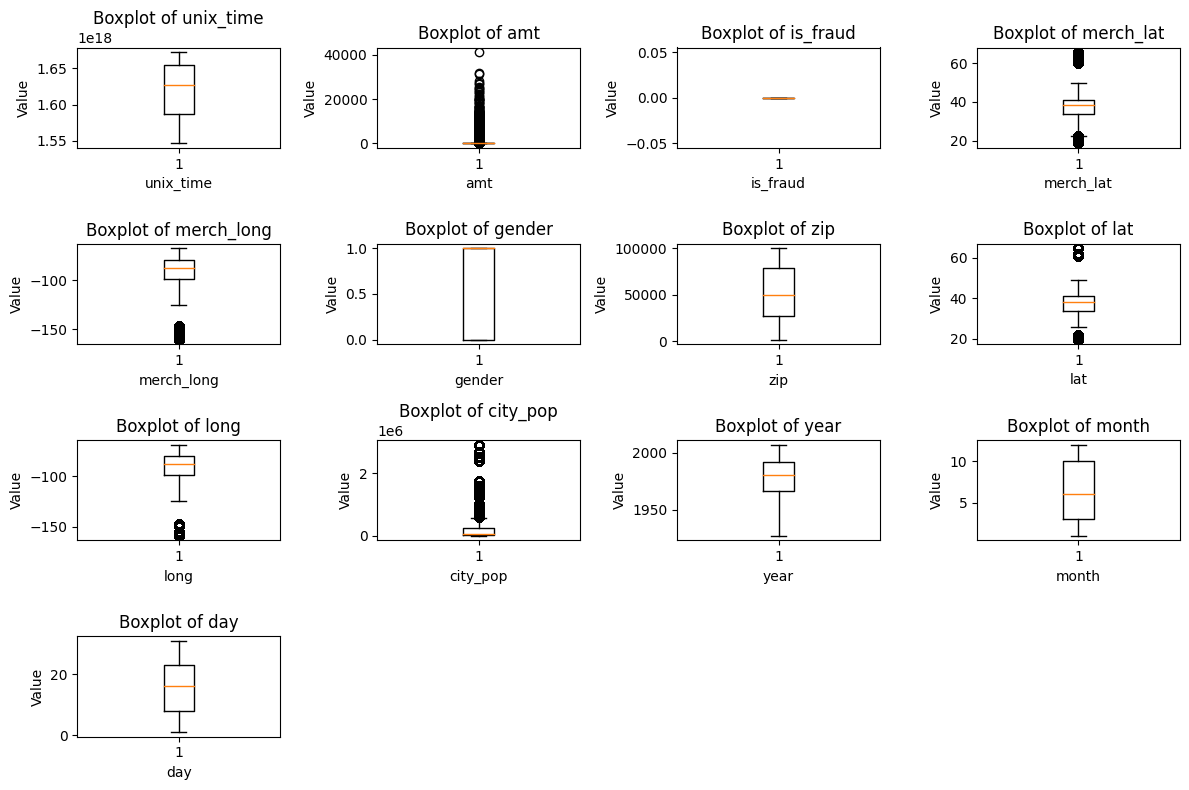

In [ ]:

# List of features to check for outliers
features = ['unix_time', 'amt', 'is_fraud', 'merch_lat', 'merch_long', 'gender', 'zip', 'lat', 'long', 'city_pop', 'year', 'month', 'day']

# Convert datetime features to numeric representation for visualization
merged_df['unix_time'] = merged_df['unix_time'].astype(int)  # Convert to integer
#merged_df['year'] = merged_df['dob'].dt.year  # Extract year from datetime
#merged_df['month'] = merged_df['dob'].dt.month  # Extract month from datetime
#merged_df['day'] = merged_df['dob'].dt.day  # Extract day from datetime

# Create boxplots for each feature
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(4, 4, features.index(feature) + 1)
    plt.boxplot(merged_df[feature])
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


##Removing outliers of merch_lat

In [ ]:

# Compute the z-scores for the 'merch_lat' column
z_scores = np.abs(stats.zscore(merged_df['merch_lat']))

# Set the threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter out rows with outlier values
merged_df_no_outliers = merged_df[(z_scores < threshold)]


##Boxplot to visualise the result of removing outliers of merch_lat

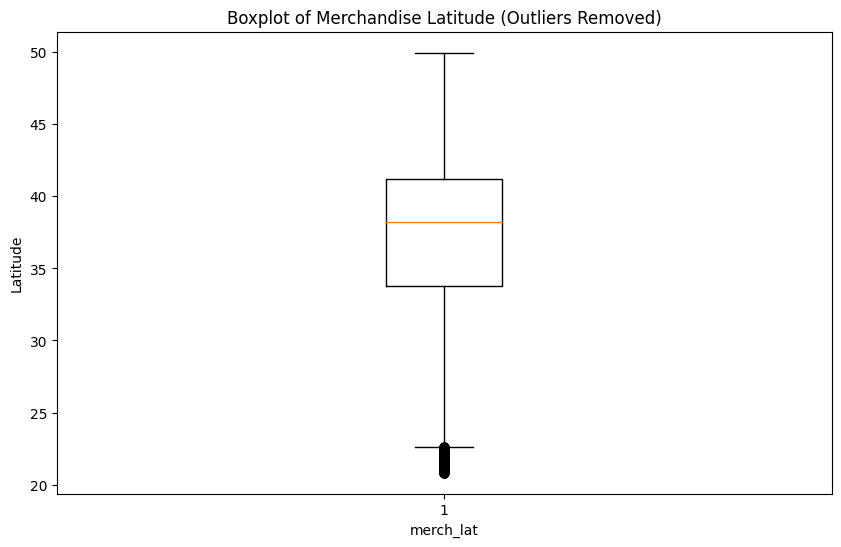

In [ ]:

# Create a boxplot of the 'merch_lat' column
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df_no_outliers['merch_lat'])
plt.xlabel('merch_lat')
plt.ylabel('Latitude')
plt.title('Boxplot of Merchandise Latitude (Outliers Removed)')
plt.show()


##IQR (Interquartile Range) method to remove the remained outliers

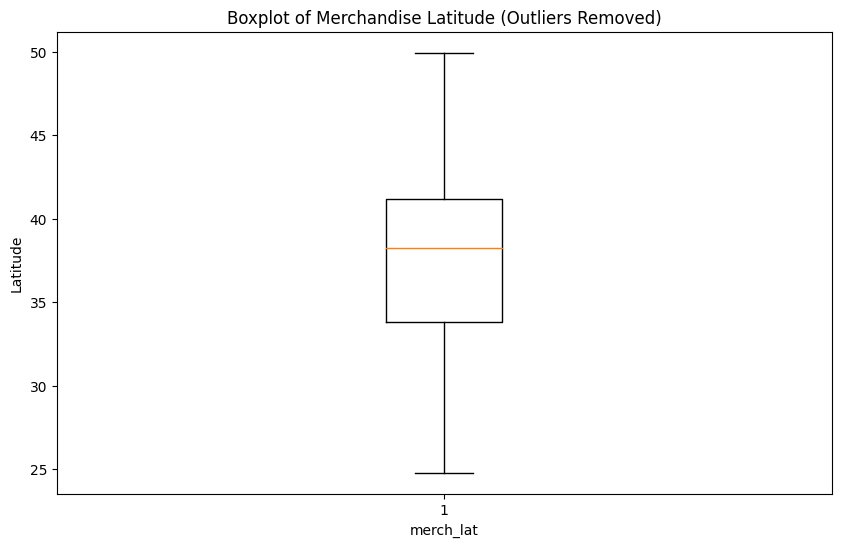

In [ ]:

# Calculate the IQR for the 'merch_lat' column
Q1 = merged_df['merch_lat'].quantile(0.25)
Q3 = merged_df['merch_lat'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.25 * IQR
upper_bound = Q3 + 1.25 * IQR

# Filter out rows with outlier values
merged_df_no_outliers = merged_df[(merged_df['merch_lat'] >= lower_bound) & (merged_df['merch_lat'] <= upper_bound)]

# Create a boxplot of the 'merch_lat' column without outliers
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df_no_outliers['merch_lat'])
plt.xlabel('merch_lat')
plt.ylabel('Latitude')
plt.title('Boxplot of Merchandise Latitude (Outliers Removed)')
plt.show()


##To remove outliers from the 'merch_long' column 

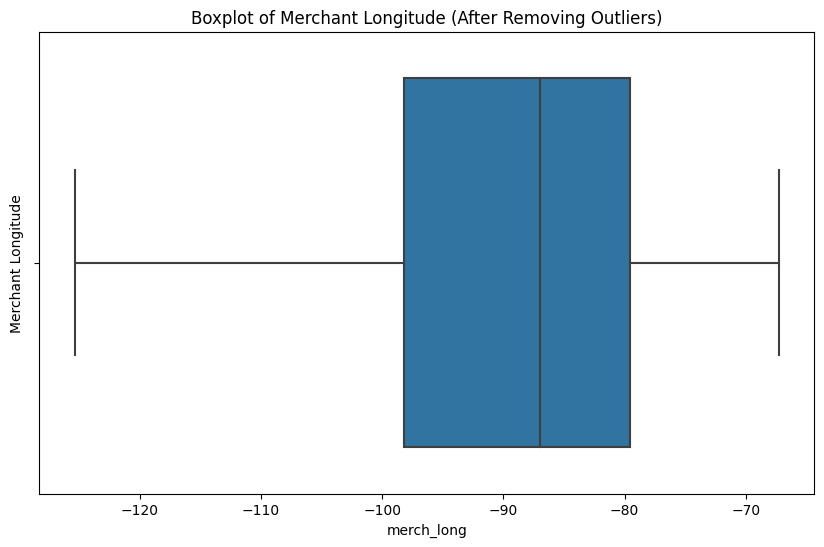

In [ ]:

# Compute the z-scores for the 'merch_long' column
z_scores = np.abs(stats.zscore(merged_df['merch_long']))

# Set the threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter out rows with outlier values
merged_df = merged_df[(z_scores < threshold)]

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='merch_long')
plt.xlabel('merch_long')
plt.ylabel('Merchant Longitude')
plt.title('Boxplot of Merchant Longitude (After Removing Outliers)')
plt.show()


##Calculates the z-scores for the 'lat' column and filters out the rows with outlier values based on the defined threshold

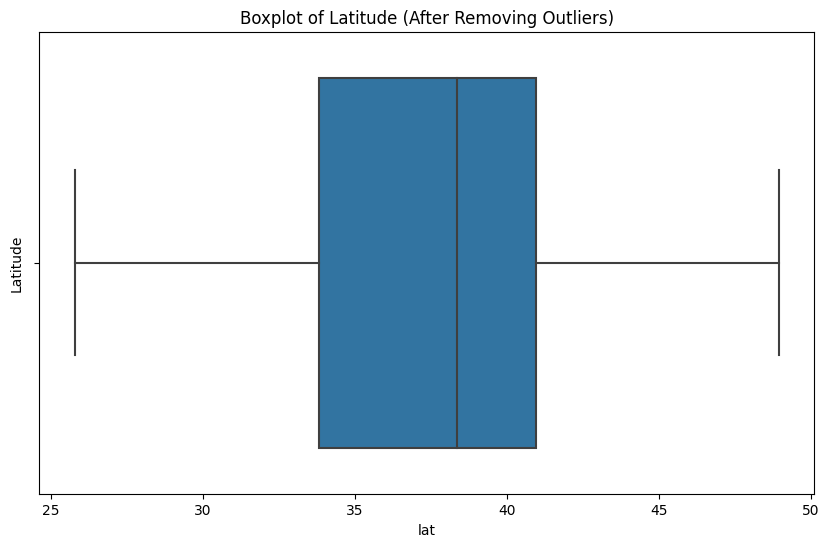

In [ ]:

# Compute the z-scores for the 'lat' column
z_scores = np.abs(stats.zscore(merged_df['lat']))

# Set the threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter out rows with outlier values
merged_df = merged_df[(z_scores < threshold)]

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='lat')
plt.xlabel('lat')
plt.ylabel('Latitude')
plt.title('Boxplot of Latitude (After Removing Outliers)')
plt.show()


##Calculates the z-scores for the 'long' column and filters out the rows with outlier values based on the defined threshold

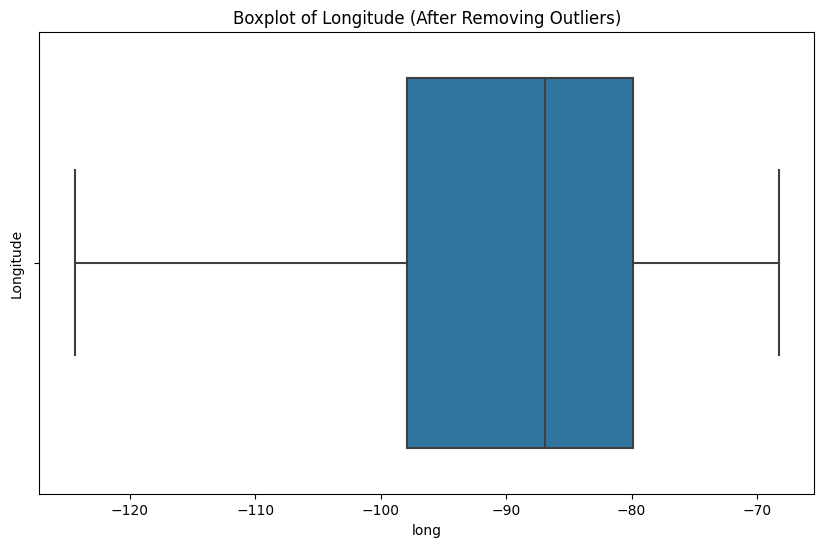

In [ ]:

# Compute the z-scores for the 'long' column
z_scores = np.abs(stats.zscore(merged_df['long']))

# Set the threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter out rows with outlier values
merged_df = merged_df[(z_scores < threshold)]

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='long')
plt.xlabel('long')
plt.ylabel('Longitude')
plt.title('Boxplot of Longitude (After Removing Outliers)')
plt.show()


##Removing outliers of city_pop

In [ ]:

# Calculate the IQR
Q1 = np.percentile(merged_df['city_pop'], 25)
Q3 = np.percentile(merged_df['city_pop'], 75)
IQR = Q3 - Q1

# Define the outlier threshold
threshold = 1.5 * IQR

# Find the outliers
outliers = merged_df[(merged_df['city_pop'] < Q1 - threshold) | (merged_df['city_pop'] > Q3 + threshold)]

# Print the outliers
print(outliers)


                   unix_time  category    amt is_fraud  merchant  merch_lat  \
16021    1568904246000000000         4  55.15        0      3838  31.097766   
16022    1551979730000000000         2  50.48        0     10302  30.986425   
16023    1575588819000000000         8  55.70        0     21741  30.544112   
16024    1599182208000000000        12  89.26        0      7469  30.139723   
16025    1586711201000000000         9  79.35        0     12470  29.680586   
...                      ...       ...    ...      ...       ...        ...   
4260530  1668413573000000000         7   6.20        0     12593  34.275322   
4260531  1669443046000000000         7   9.30        0      6365  34.733890   
4260532  1669894392000000000         7   4.90        0     12711  35.312756   
4260533  1665139064000000000         6   1.53        0      7316  34.709196   
4260534  1671961725000000000        13   5.99        0      4852  35.084211   

         merch_long  gender  street  city  state   

##Calculation of Winsorization Percentile

##Calculation of Winsorization Percentile

In [ ]:
winsorization_percentile = merged_df['city_pop'].quantile(0.99)


##Winsorization of 'city_pop' Variable

In [ ]:
merged_df['city_pop'] = np.where(merged_df['city_pop'] > winsorization_percentile, winsorization_percentile, merged_df['city_pop'])


##Boxplot of 'city_pop' After Winsorization

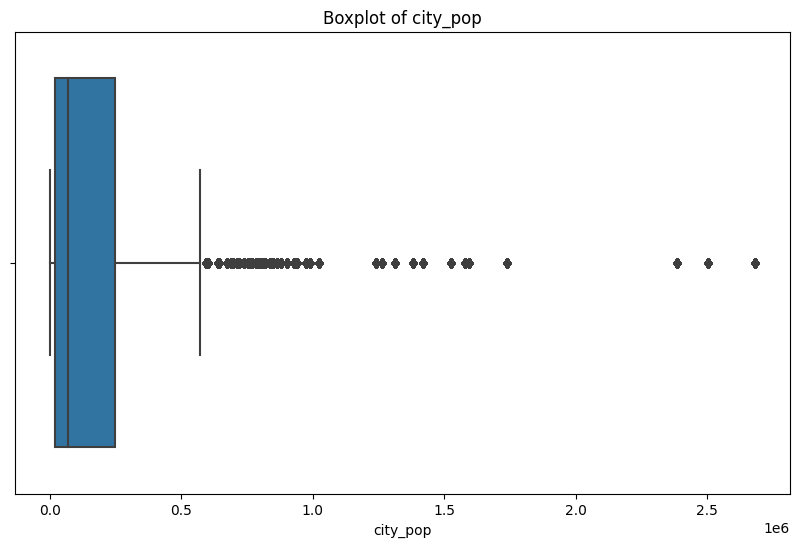

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['city_pop'])
plt.xlabel('city_pop')
plt.title('Boxplot of city_pop')
plt.show()


##Z-Score Calculation for 'city_pop'

In [ ]:
from scipy import stats

# Calculate z-scores for the 'amt' feature
z_scores = stats.zscore(merged_df['city_pop'])


##Z-Score Threshold for Outlier Detection

In [ ]:
threshold = 6


##Outlier Detection Based on Z-Scores

In [ ]:
outliers = merged_df[abs(z_scores) > threshold]


##Removal of Outliers from the Dataset

In [ ]:
# Remove outliers from the dataset
merged_df_no_outliers = merged_df[abs(z_scores) <= threshold]


##Calculation of Interquartile Range (IQR)

In [ ]:
Q1 = np.percentile(merged_df['city_pop'], 25)
Q3 = np.percentile(merged_df['city_pop'], 75)
IQR = Q3 - Q1


##Outlier Detection using IQR Method

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = merged_df[(merged_df['city_pop'] < lower_bound) | (merged_df['city_pop'] > upper_bound)]


##Calculation of Median and Median Absolute Deviation (MAD)

In [ ]:
median = np.median(merged_df['city_pop'])
mad = stats.median_abs_deviation(merged_df['city_pop'])


##Outlier Detection using Median and Median Absolute Deviation (MAD)

In [ ]:
lower_bound = median - 3 * mad
upper_bound = median + 3 * mad
outliers = merged_df[(merged_df['city_pop'] < lower_bound) | (merged_df['city_pop'] > upper_bound)]


##Log Transformation of 'city_pop'

In [ ]:
merged_df['city_pop_transformed'] = np.log1p(merged_df['city_pop'])


In [ ]:
merged_df.head()

,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,gender,street,city,state,zip,lat,long,city_pop,job,year,month,day,city_pop_transformed
0,1558719550000000000,2,69.12,0,15205,39.491416,-75.588522,0,843,14,38,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315
1,1569425519000000000,4,68.11,0,19705,40.890319,-75.573359,0,843,14,38,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315
2,1577205601000000000,8,40.35,0,4778,39.244958,-74.475327,0,843,14,38,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315
3,1571428238000000000,4,96.22,0,10615,39.656925,-75.802342,0,843,14,38,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315
4,1549840400000000000,2,71.89,0,7171,40.313342,-74.220434,0,843,14,38,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315


##Boxplot of Transformed 'city_pop'

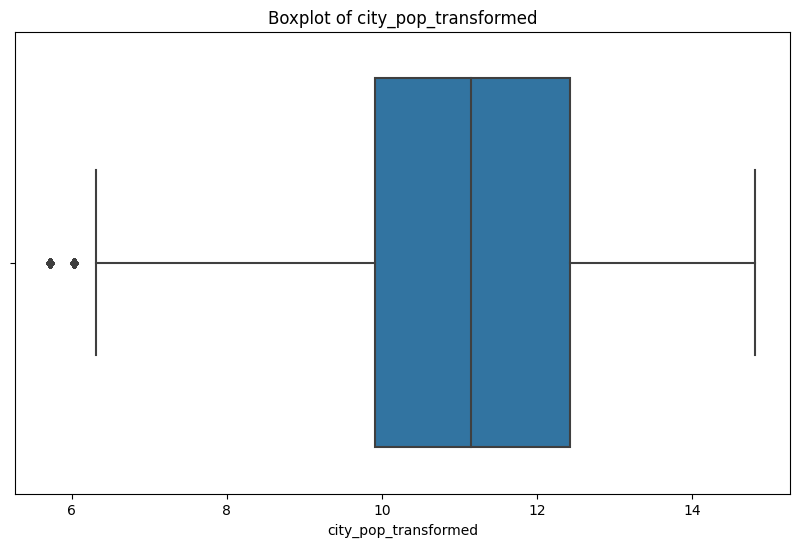

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['city_pop_transformed'])
plt.xlabel('city_pop_transformed')
plt.title('Boxplot of city_pop_transformed')
plt.show()

##Log Transformation of 'city_pop'

In [ ]:
merged_df['city_pop_transformed1'] = np.log(merged_df['city_pop'])

In [ ]:
merged_df.head()

,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,gender,street,city,...,zip,lat,long,city_pop,job,year,month,day,city_pop_transformed,city_pop_transformed1
0,1558719550000000000,2,69.12,0,15205,39.491416,-75.588522,0,843,14,...,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284
1,1569425519000000000,4,68.11,0,19705,40.890319,-75.573359,0,843,14,...,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284
2,1577205601000000000,8,40.35,0,4778,39.244958,-74.475327,0,843,14,...,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284
3,1571428238000000000,4,96.22,0,10615,39.656925,-75.802342,0,843,14,...,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284
4,1549840400000000000,2,71.89,0,7171,40.313342,-74.220434,0,843,14,...,19002,40.1809,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284


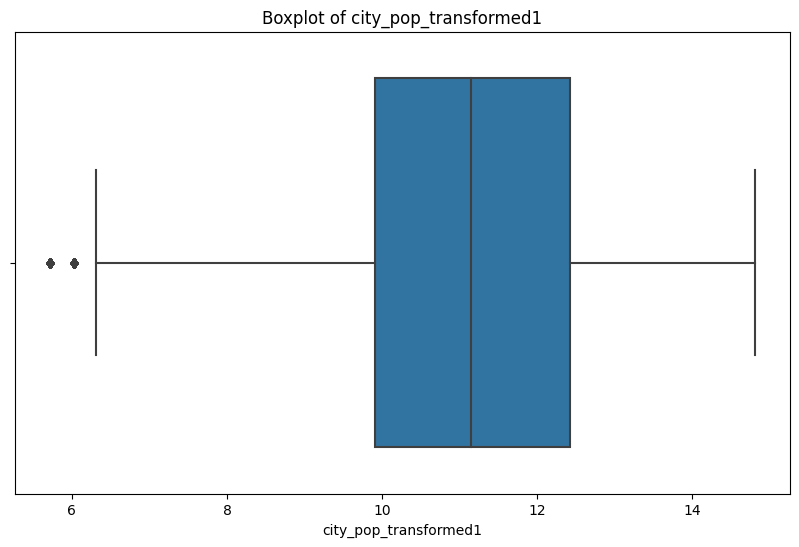

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['city_pop_transformed1'])
plt.xlabel('city_pop_transformed1')
plt.title('Boxplot of city_pop_transformed1')
plt.show()

## Create a boxplot of the 'amt' feature

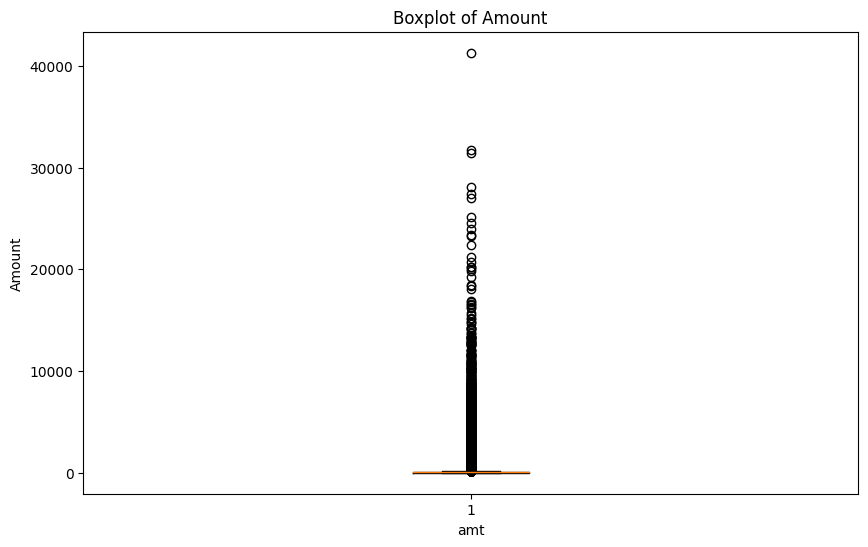

In [ ]:

# Create a boxplot of the 'amt' feature
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df['amt'])
plt.xlabel('amt')
plt.ylabel('Amount')
plt.title('Boxplot of Amount')
plt.show()


##Log Transformation of 'amt'

In [ ]:
merged_df['amt_transformed'] = np.log(merged_df['amt'])

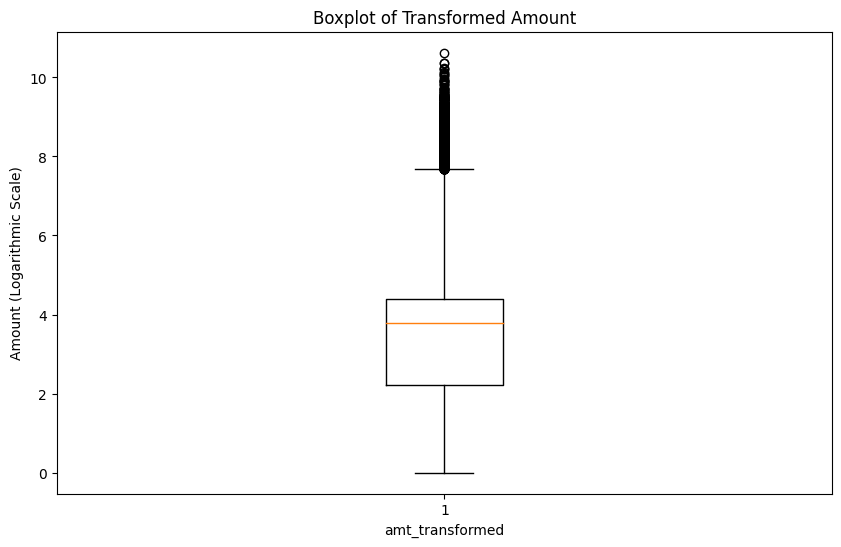

In [ ]:

plt.figure(figsize=(10, 6))
plt.boxplot(merged_df['amt_transformed'])
plt.xlabel('amt_transformed')
plt.ylabel('Amount (Logarithmic Scale)')
plt.title('Boxplot of Transformed Amount')
plt.show()


##Capping Extreme High Values of 'amt'

In [ ]:

# Calculate the 99th percentile of 'amt'
threshold = np.percentile(merged_df['amt'], 99)

# Cap the extreme high values above the threshold
merged_df['amt_capped'] = np.where(merged_df['amt'] > threshold, threshold, merged_df['amt'])




##Boxplot of Capped Amount

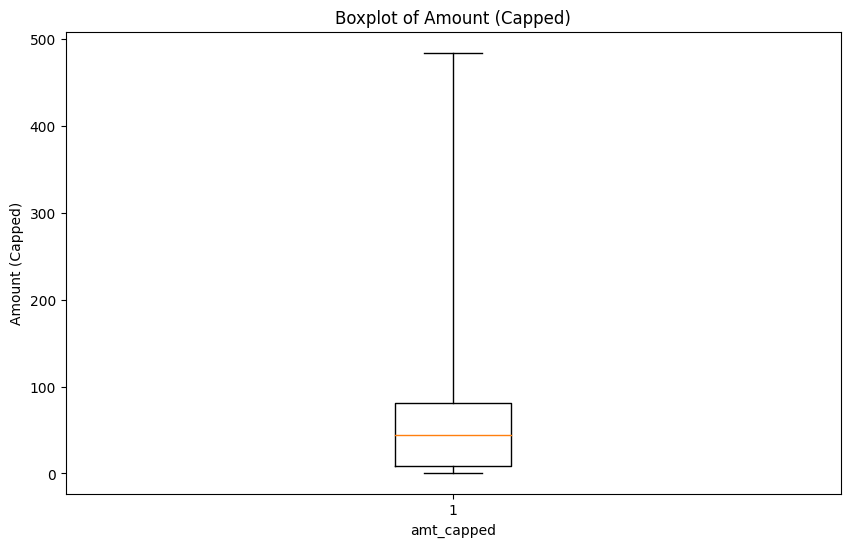

In [ ]:

# Create a boxplot of the 'amt_capped' variable with a different outlier range
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df['amt_capped'], whis=6)
plt.xlabel('amt_capped')
plt.ylabel('Amount (Capped)')
plt.title('Boxplot of Amount (Capped)')
plt.show()


In [ ]:
merged_df.head()

,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,gender,street,city,...,long,city_pop,job,year,month,day,city_pop_transformed,city_pop_transformed1,amt_transformed,amt_capped
0,1558719550000000000,2,69.12,0,15205,39.491416,-75.588522,0,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.235844,69.12
1,1569425519000000000,4,68.11,0,19705,40.890319,-75.573359,0,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.221124,68.11
2,1577205601000000000,8,40.35,0,4778,39.244958,-74.475327,0,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,3.697591,40.35
3,1571428238000000000,4,96.22,0,10615,39.656925,-75.802342,0,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.566637,96.22
4,1549840400000000000,2,71.89,0,7171,40.313342,-74.220434,0,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.275137,71.89


In [ ]:
merged_df.columns

Index(['unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'year', 'month', 'day', 'city_pop_transformed',
       'city_pop_transformed1', 'amt_transformed', 'amt_capped'],
      dtype='object')

##Correlation Heatmap

<ipython-input-65-929edfe37df4>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df[columns].corr()


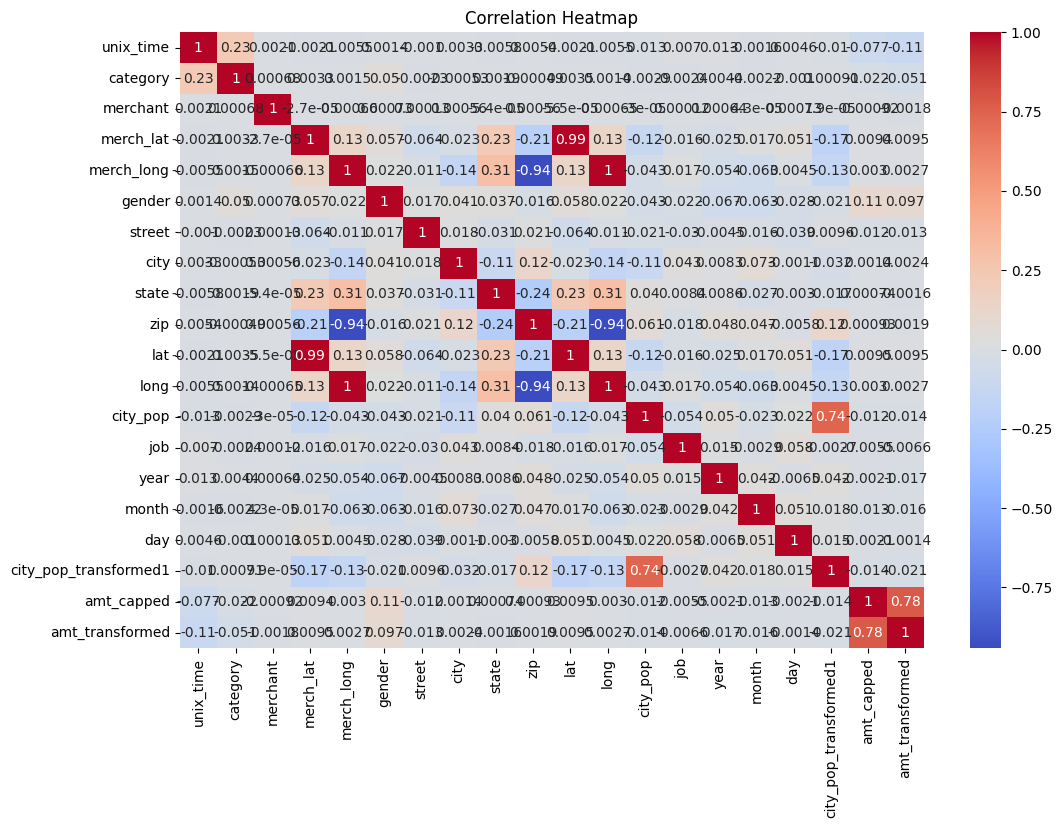

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for correlation analysis
columns = ['unix_time', 'category', 'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'year', 'month', 'day', 'city_pop_transformed1', 'amt_capped', 'amt_transformed']

# Create a correlation matrix
corr_matrix = merged_df[columns].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##Correlation Heatmap for Selected Features

<ipython-input-66-fcf8fc8c6201>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df[features].corr()


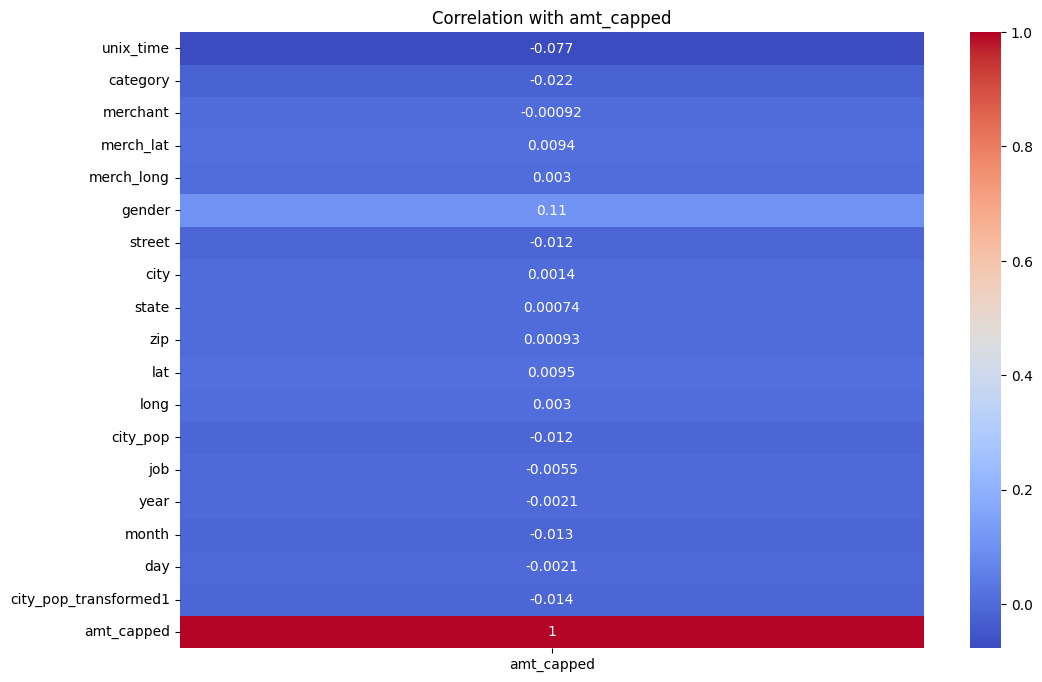

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features to evaluate
features = ['unix_time', 'category', 'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'year', 'month', 'day', 'city_pop_transformed1', 'amt_capped']

# Calculate the correlation matrix
corr_matrix = merged_df[features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['amt_capped']], annot=True, cmap='coolwarm')
plt.title('Correlation with amt_capped')
plt.show()


## Print the correlation values


In [ ]:
# Print the correlation values
correlation_values = corr_matrix['amt_capped']
print(correlation_values)


unix_time               -0.077479
category                -0.021898
merchant                -0.000925
merch_lat                0.009421
merch_long               0.003002
gender                   0.107581
street                  -0.011623
city                     0.001391
state                    0.000738
zip                      0.000926
lat                      0.009501
long                     0.003019
city_pop                -0.011573
job                     -0.005524
year                    -0.002088
month                   -0.013180
day                     -0.002069
city_pop_transformed1   -0.014059
amt_capped               1.000000
Name: amt_capped, dtype: float64


## Check for NaN values in the dataset

In [ ]:
# Check for NaN values in the dataset
nan_count = merged_df.isna().sum()

# Print the number of NaN values for each column
print(nan_count)


unix_time                0
category                 0
amt                      0
is_fraud                 0
merchant                 0
merch_lat                0
merch_long               0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
year                     0
month                    0
day                      0
city_pop_transformed     0
city_pop_transformed1    0
amt_transformed          0
amt_capped               0
dtype: int64


##Fraudulent Transactions Removal

In [ ]:
# Remove rows where is_fraud is equal to 1
merged_df = merged_df[merged_df['is_fraud'] != 1]


##Check for duplicate rows in the DataFrame

In [ ]:
duplicate_rows = merged_df.duplicated()
print(duplicate_rows)

0          False
1          False
2          False
3          False
4          False
           ...  
4260899    False
4260900    False
4260901    False
4260902    False
4260903    False
Length: 4185415, dtype: bool


In [ ]:
merged_df.head()

,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,gender,street,city,...,long,city_pop,job,year,month,day,city_pop_transformed,city_pop_transformed1,amt_transformed,amt_capped
0,1558719550000000000,2,69.12,0,15205,39.491416,-75.588522,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.235844,69.12
1,1569425519000000000,4,68.11,0,19705,40.890319,-75.573359,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.221124,68.11
2,1577205601000000000,8,40.35,0,4778,39.244958,-74.475327,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,3.697591,40.35
3,1571428238000000000,4,96.22,0,10615,39.656925,-75.802342,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.566637,96.22
4,1549840400000000000,2,71.89,0,7171,40.313342,-74.220434,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.275137,71.89


In [ ]:
print(merged_df.columns)

Index(['unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'year', 'month', 'day', 'city_pop_transformed',
       'city_pop_transformed1', 'amt_transformed', 'amt_capped'],
      dtype='object')


##Create boxplots for each of the specified features in order to visually examine the distribution and identify any potential outliers.



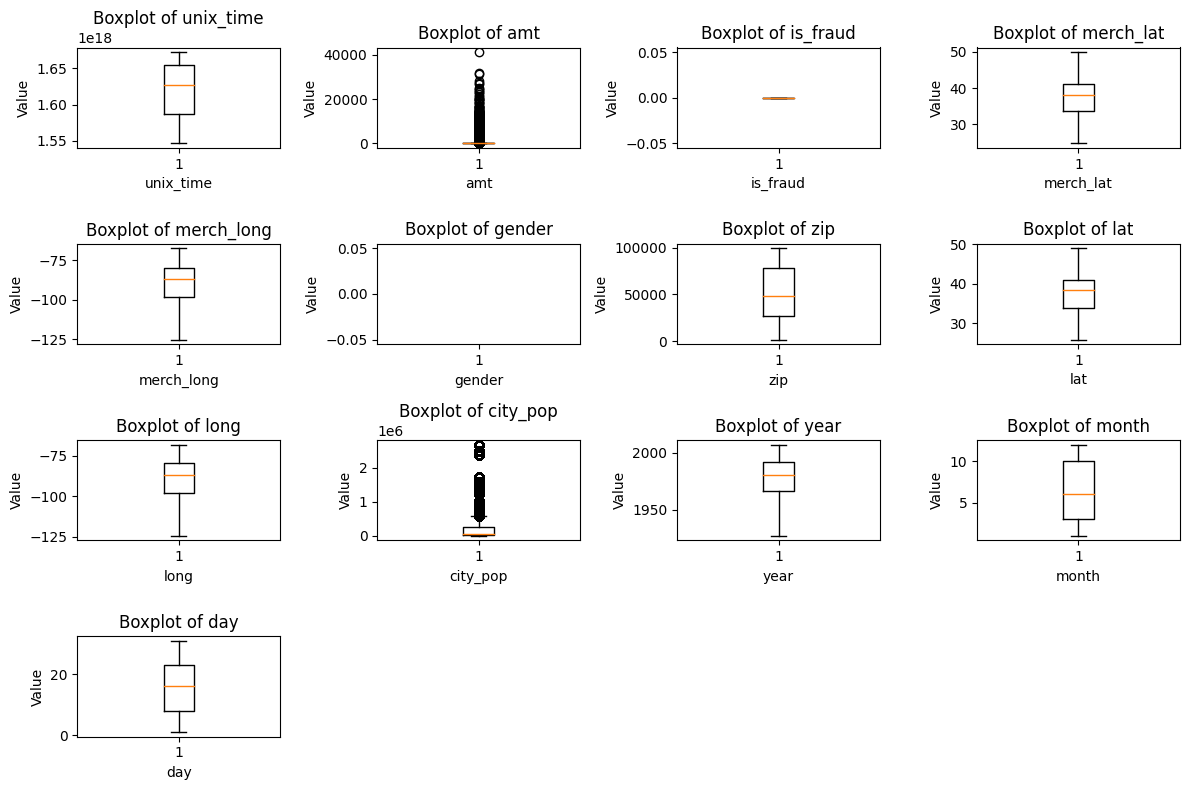

In [ ]:

# List of features to check for outliers
features = ['unix_time', 'amt', 'is_fraud', 'merch_lat', 'merch_long', 'gender', 'zip', 'lat', 'long', 'city_pop', 'year', 'month', 'day']

# Convert datetime features to numeric representation for visualization
merged_df['unix_time'] = merged_df['unix_time'].astype(int)  # Convert to integer
#merged_df['year'] = merged_df['dob'].dt.year  # Extract year from datetime
#merged_df['month'] = merged_df['dob'].dt.month  # Extract month from datetime
#merged_df['day'] = merged_df['dob'].dt.day  # Extract day from datetime

# Create boxplots for each feature
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(4, 4, features.index(feature) + 1)
    plt.boxplot(merged_df[feature])
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


##Removing outliers of merch_lat

In [ ]:

# Compute the z-scores for the 'merch_lat' column
z_scores = np.abs(stats.zscore(merged_df['merch_lat']))

# Set the threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter out rows with outlier values
merged_df_no_outliers = merged_df[(z_scores < threshold)]


##Boxplot to visualise the result of removing outliers of merch_lat

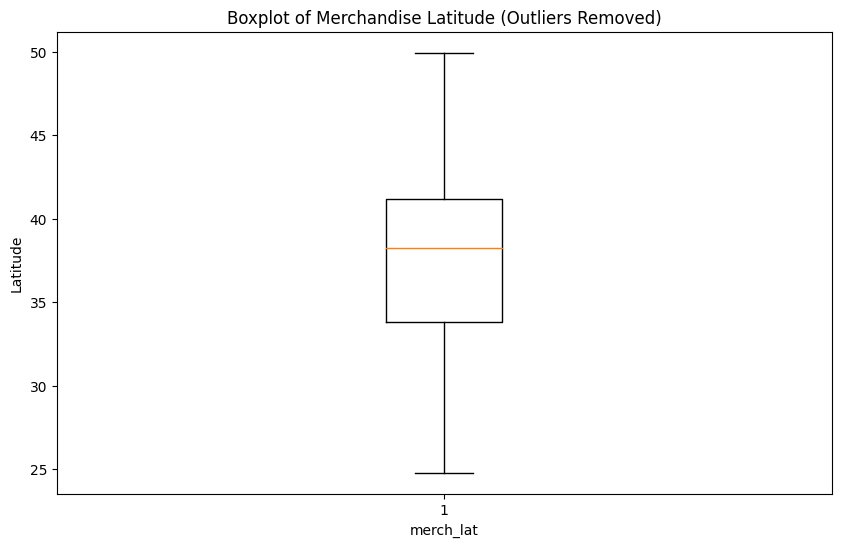

In [ ]:

# Create a boxplot of the 'merch_lat' column
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df_no_outliers['merch_lat'])
plt.xlabel('merch_lat')
plt.ylabel('Latitude')
plt.title('Boxplot of Merchandise Latitude (Outliers Removed)')
plt.show()


##IQR (Interquartile Range) method to remove the remained outliers

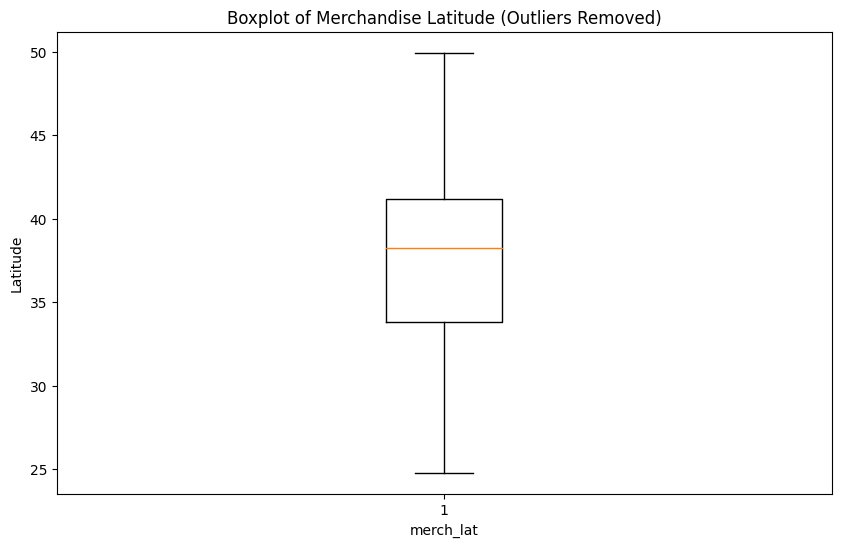

In [ ]:

# Calculate the IQR for the 'merch_lat' column
Q1 = merged_df['merch_lat'].quantile(0.25)
Q3 = merged_df['merch_lat'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.25 * IQR
upper_bound = Q3 + 1.25 * IQR

# Filter out rows with outlier values
merged_df_no_outliers = merged_df[(merged_df['merch_lat'] >= lower_bound) & (merged_df['merch_lat'] <= upper_bound)]

# Create a boxplot of the 'merch_lat' column without outliers
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df_no_outliers['merch_lat'])
plt.xlabel('merch_lat')
plt.ylabel('Latitude')
plt.title('Boxplot of Merchandise Latitude (Outliers Removed)')
plt.show()


##To remove outliers from the 'merch_long' column 

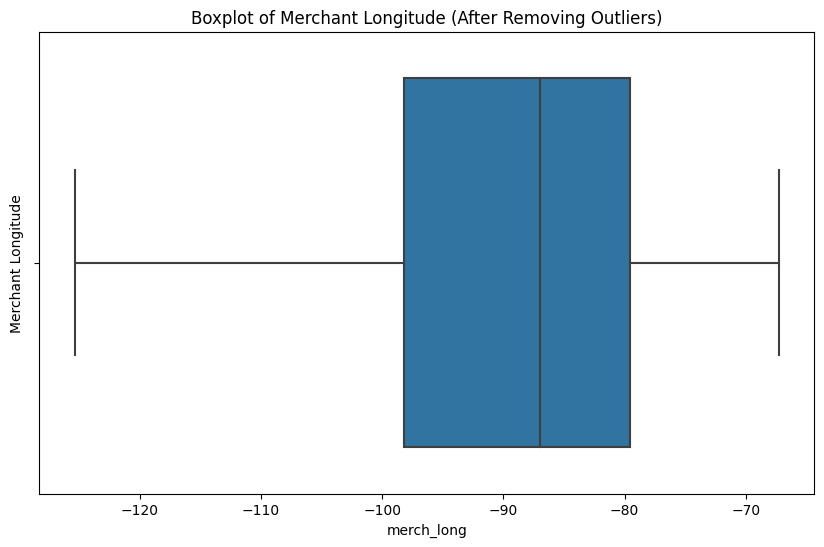

In [ ]:

# Compute the z-scores for the 'merch_long' column
z_scores = np.abs(stats.zscore(merged_df['merch_long']))

# Set the threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter out rows with outlier values
merged_df = merged_df[(z_scores < threshold)]

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='merch_long')
plt.xlabel('merch_long')
plt.ylabel('Merchant Longitude')
plt.title('Boxplot of Merchant Longitude (After Removing Outliers)')
plt.show()


##Outlier Removal and Boxplot of Latitude

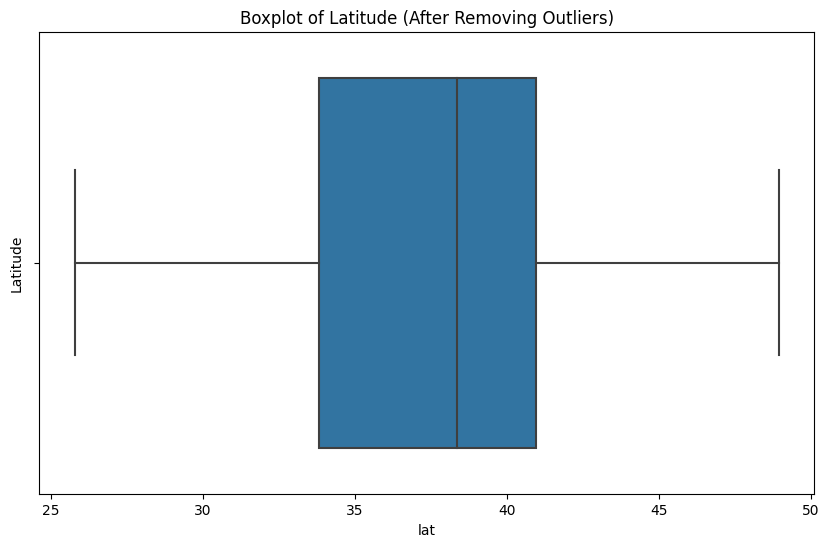

In [ ]:

# Compute the z-scores for the 'lat' column
z_scores = np.abs(stats.zscore(merged_df['lat']))

# Set the threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter out rows with outlier values
merged_df = merged_df[(z_scores < threshold)]

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='lat')
plt.xlabel('lat')
plt.ylabel('Latitude')
plt.title('Boxplot of Latitude (After Removing Outliers)')
plt.show()


##Calculates the z-scores for the 'long' column and filters out the rows with outlier values based on the defined threshold

##Outlier Removal and Boxplot of Longitude

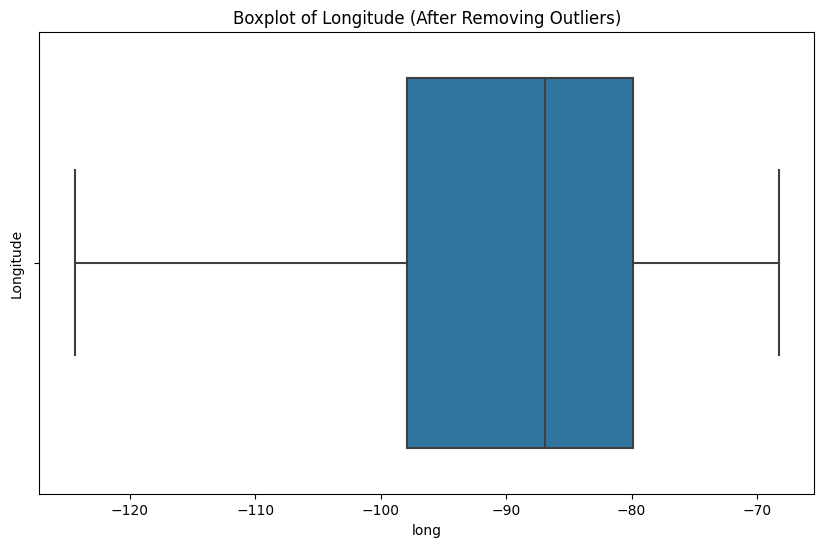

In [ ]:

# Compute the z-scores for the 'long' column
z_scores = np.abs(stats.zscore(merged_df['long']))

# Set the threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Filter out rows with outlier values
merged_df = merged_df[(z_scores < threshold)]

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='long')
plt.xlabel('long')
plt.ylabel('Longitude')
plt.title('Boxplot of Longitude (After Removing Outliers)')
plt.show()


##Identification of Outliers in the City Population Variable

In [ ]:

# Calculate the IQR
Q1 = np.percentile(merged_df['city_pop'], 25)
Q3 = np.percentile(merged_df['city_pop'], 75)
IQR = Q3 - Q1

# Define the outlier threshold
threshold = 1.5 * IQR

# Find the outliers
outliers = merged_df[(merged_df['city_pop'] < Q1 - threshold) | (merged_df['city_pop'] > Q3 + threshold)]

# Print the outliers
print(outliers)


                   unix_time  category    amt is_fraud  merchant  merch_lat  \
16021    1568904246000000000         4  55.15        0      3838  31.097766   
16022    1551979730000000000         2  50.48        0     10302  30.986425   
16023    1575588819000000000         8  55.70        0     21741  30.544112   
16024    1599182208000000000        12  89.26        0      7469  30.139723   
16025    1586711201000000000         9  79.35        0     12470  29.680586   
...                      ...       ...    ...      ...       ...        ...   
4260530  1668413573000000000         7   6.20        0     12593  34.275322   
4260531  1669443046000000000         7   9.30        0      6365  34.733890   
4260532  1669894392000000000         7   4.90        0     12711  35.312756   
4260533  1665139064000000000         6   1.53        0      7316  34.709196   
4260534  1671961725000000000        13   5.99        0      4852  35.084211   

         merch_long  gender  street  city  ...     

In [ ]:
winsorization_percentile = merged_df['city_pop'].quantile(0.99)


In [ ]:
merged_df['city_pop'] = np.where(merged_df['city_pop'] > winsorization_percentile, winsorization_percentile, merged_df['city_pop'])


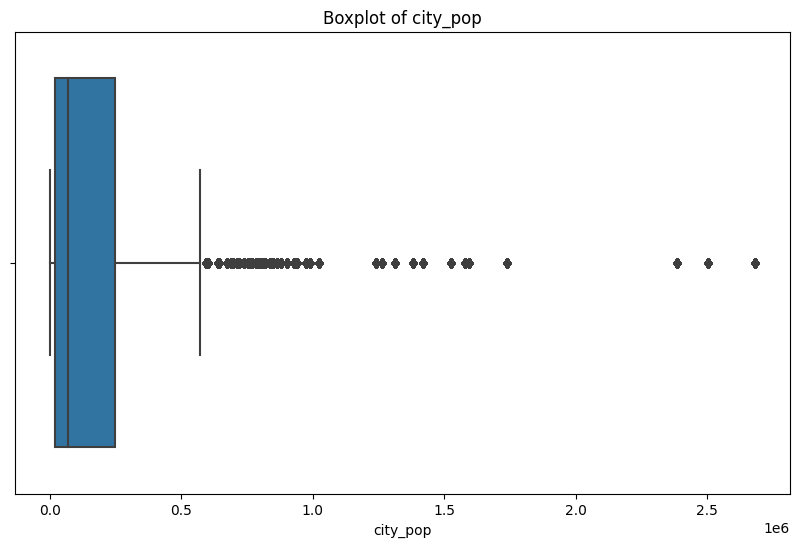

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['city_pop'])
plt.xlabel('city_pop')
plt.title('Boxplot of city_pop')
plt.show()


##Z-score Calculation for City Population Variable

In [ ]:
from scipy import stats

# Calculate z-scores for the 'amt' feature
z_scores = stats.zscore(merged_df['city_pop'])


In [ ]:
threshold = 6


## Outlier Detection Based on Z-scores for City Population Variable

In [ ]:
outliers = merged_df[abs(z_scores) > threshold]


##Removal of Outliers from the Dataset Based on Z-scores for City Population Variable

In [ ]:
# Remove outliers from the dataset
merged_df_no_outliers = merged_df[abs(z_scores) <= threshold]


##Calculation of Interquartile Range (IQR) for City Population Variable

In [ ]:
Q1 = np.percentile(merged_df['city_pop'], 25)
Q3 = np.percentile(merged_df['city_pop'], 75)
IQR = Q3 - Q1


##Identification of Outliers Using IQR Method for City Population Variable

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = merged_df[(merged_df['city_pop'] < lower_bound) | (merged_df['city_pop'] > upper_bound)]


##Calculation of Median and Median Absolute Deviation (MAD) for City Population Variable

In [ ]:
median = np.median(merged_df['city_pop'])
mad = stats.median_abs_deviation(merged_df['city_pop'])


##Identification of Outliers using Median Absolute Deviation (MAD) for City Population Variable

In [ ]:
lower_bound = median - 3 * mad
upper_bound = median + 3 * mad
outliers = merged_df[(merged_df['city_pop'] < lower_bound) | (merged_df['city_pop'] > upper_bound)]


##Logarithmic Transformation of City Population Variable for Improved Distribution

In [ ]:
merged_df['city_pop_transformed'] = np.log1p(merged_df['city_pop'])


In [ ]:
merged_df.head()

,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,gender,street,city,...,long,city_pop,job,year,month,day,city_pop_transformed,city_pop_transformed1,amt_transformed,amt_capped
0,1558719550000000000,2,69.12,0,15205,39.491416,-75.588522,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.235844,69.12
1,1569425519000000000,4,68.11,0,19705,40.890319,-75.573359,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.221124,68.11
2,1577205601000000000,8,40.35,0,4778,39.244958,-74.475327,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,3.697591,40.35
3,1571428238000000000,4,96.22,0,10615,39.656925,-75.802342,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.566637,96.22
4,1549840400000000000,2,71.89,0,7171,40.313342,-74.220434,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.275137,71.89


##Boxplot of city_pop_transformed

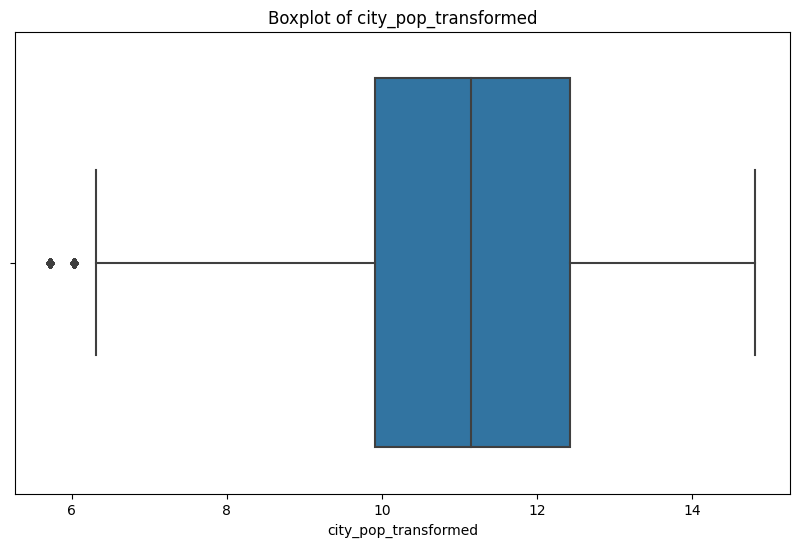

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['city_pop_transformed'])
plt.xlabel('city_pop_transformed')
plt.title('Boxplot of city_pop_transformed')
plt.show()

##Log Transformation of City Population Variable

In [ ]:
merged_df['city_pop_transformed1'] = np.log(merged_df['city_pop'])

In [ ]:
merged_df.head()

,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,gender,street,city,...,long,city_pop,job,year,month,day,city_pop_transformed,city_pop_transformed1,amt_transformed,amt_capped
0,1558719550000000000,2,69.12,0,15205,39.491416,-75.588522,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.235844,69.12
1,1569425519000000000,4,68.11,0,19705,40.890319,-75.573359,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.221124,68.11
2,1577205601000000000,8,40.35,0,4778,39.244958,-74.475327,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,3.697591,40.35
3,1571428238000000000,4,96.22,0,10615,39.656925,-75.802342,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.566637,96.22
4,1549840400000000000,2,71.89,0,7171,40.313342,-74.220434,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.275137,71.89


##Boxplot for city_pop_transformed1

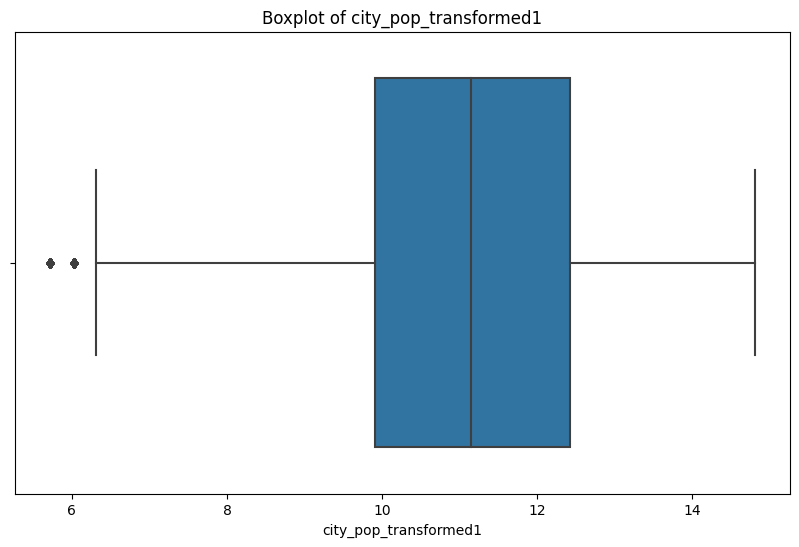

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['city_pop_transformed1'])
plt.xlabel('city_pop_transformed1')
plt.title('Boxplot of city_pop_transformed1')
plt.show()

## Create a boxplot of the 'amt' feature

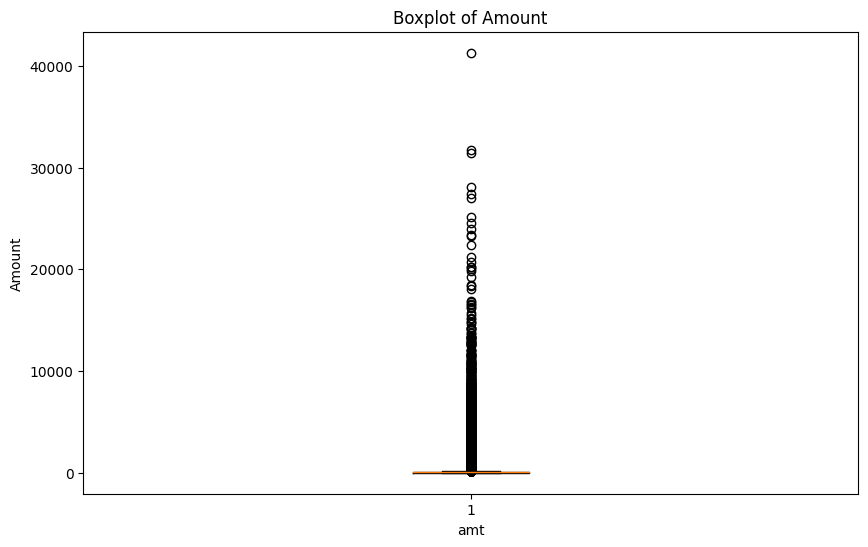

In [ ]:

# Create a boxplot of the 'amt' feature
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df['amt'])
plt.xlabel('amt')
plt.ylabel('Amount')
plt.title('Boxplot of Amount')
plt.show()


##Log Transformation of Amount Variable

In [ ]:
merged_df['amt_transformed'] = np.log(merged_df['amt'])

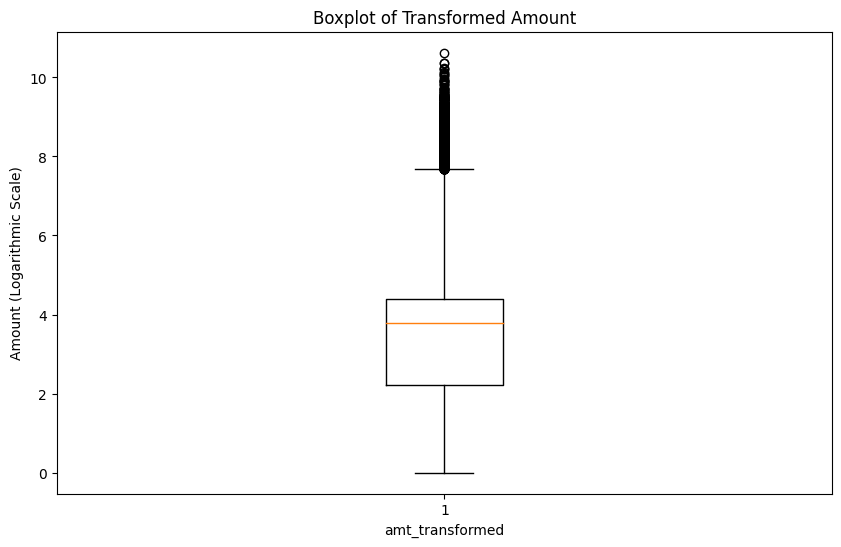

In [ ]:

plt.figure(figsize=(10, 6))
plt.boxplot(merged_df['amt_transformed'])
plt.xlabel('amt_transformed')
plt.ylabel('Amount (Logarithmic Scale)')
plt.title('Boxplot of Transformed Amount')
plt.show()


##Capting Extreme High Values in 'amt' Feature at the 99th Percentile

In [ ]:

# Calculate the 99th percentile of 'amt'
threshold = np.percentile(merged_df['amt'], 99)

# Cap the extreme high values above the threshold
merged_df['amt_capped'] = np.where(merged_df['amt'] > threshold, threshold, merged_df['amt'])




##Boxplot of Capped Amount Variable with Custom Outlier Range

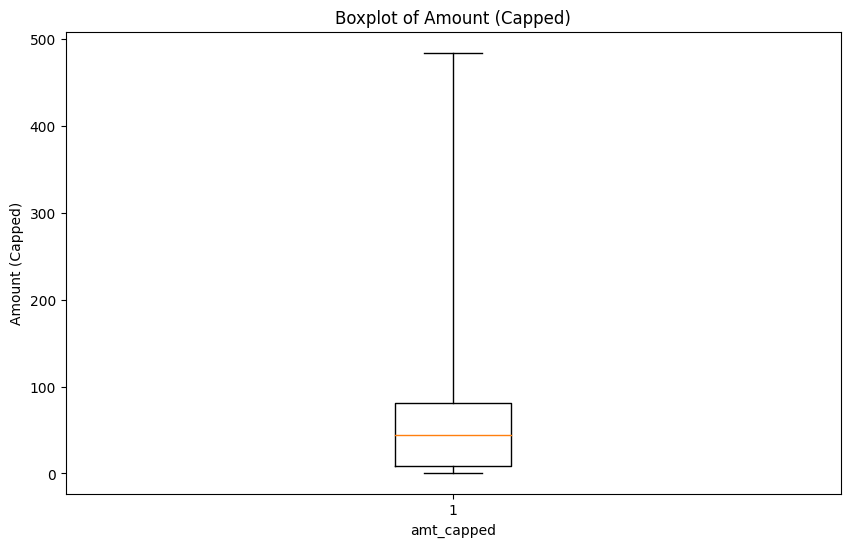

In [ ]:

# Create a boxplot of the 'amt_capped' variable with a different outlier range
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df['amt_capped'], whis=6)
plt.xlabel('amt_capped')
plt.ylabel('Amount (Capped)')
plt.title('Boxplot of Amount (Capped)')
plt.show()


In [ ]:
merged_df.head()

,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,gender,street,city,...,long,city_pop,job,year,month,day,city_pop_transformed,city_pop_transformed1,amt_transformed,amt_capped
0,1558719550000000000,2,69.12,0,15205,39.491416,-75.588522,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.235844,69.12
1,1569425519000000000,4,68.11,0,19705,40.890319,-75.573359,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.221124,68.11
2,1577205601000000000,8,40.35,0,4778,39.244958,-74.475327,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,3.697591,40.35
3,1571428238000000000,4,96.22,0,10615,39.656925,-75.802342,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.566637,96.22
4,1549840400000000000,2,71.89,0,7171,40.313342,-74.220434,NaN,843,14,...,-75.2156,32412.0,5,1959,10,3,10.386315,10.386284,4.275137,71.89


In [ ]:
merged_df.columns

Index(['unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'year', 'month', 'day', 'city_pop_transformed',
       'city_pop_transformed1', 'amt_transformed', 'amt_capped'],
      dtype='object')

#3.Modeling

#A.Linear Regression

##Linear Regression for Predicting Customers' Spending Amount using job Feature

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the selected feature
feature = 'job'

# Split the data into input feature (X) and target variable (y)
X = merged_df[[feature]]
y = merged_df['amt_capped']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions on the data
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = model.score(X, y)

# Print the feature and its evaluation metrics
print(f"{feature}:")
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)





job:
R-squared: 3.0520028717839764e-05
Mean Absolute Error (MAE): 50.43025274261639
Mean Squared Error (MSE): 5880.651898259409


##Linear Regression for Predicting Customers' Spending Amount using category Feature

In [ ]:
# Define the selected feature
feature = 'category'

# Split the data into input features (X) and target variable (y)
X = merged_df[[feature]]
y = merged_df['amt_capped']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions on the data
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = model.score(X, y)

# Print the feature and its evaluation metrics
print(f"{feature}:")
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
# Print the feature and its evaluation metrics



category:
R-squared: 0.00047953443987547306
Mean Absolute Error (MAE): 50.384679761133725
Mean Squared Error (MSE): 5878.011320219571


##Linear Regression for Predicting Customers' Spending Amount using merchant Feature

In [ ]:
# Define the selected feature
feature = 'merchant'

# Split the data into input features (X) and target variable (y)
X = merged_df[[feature]]
y = merged_df['amt_capped']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions on the data
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = model.score(X, y)

# Print the feature and its evaluation metrics
print(f"{feature}:")
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
# Print the feature and its evaluation metrics



merchant:
R-squared: 8.54880586320661e-07
Mean Absolute Error (MAE): 50.431492098476284
Mean Squared Error (MSE): 5880.826353993474


##Linear Regression for Predicting Customers' Spending Amount using merch_lat Feature

In [ ]:
# Define the selected feature
feature = 'merch_lat'

# Split the data into input features (X) and target variable (y)
X = merged_df[[feature]]
y = merged_df['amt_capped']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions on the data
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = model.score(X, y)

# Print the feature and its evaluation metrics
#print(f"{feature}:")
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
# Print the feature and its evaluation metrics



R-squared: 8.876005621949457e-05
Mean Absolute Error (MAE): 50.42858404766056
Mean Squared Error (MSE): 5880.3093984780235


##Linear Regression for Predicting Customers' Spending Amount using merch_long Feature

In [ ]:
# Define the selected feature
feature = 'merch_long'

# Split the data into input features (X) and target variable (y)
X = merged_df[[feature]]
y = merged_df['amt_capped']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions on the data
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = model.score(X, y)

# Print the feature and its evaluation metrics
#print(f"{feature}:")
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
# Print the feature and its evaluation metrics



R-squared: 9.013398014512397e-06
Mean Absolute Error (MAE): 50.43100548126605
Mean Squared Error (MSE): 5880.778375128157


##Linear Regression for Predicting Customers' Spending Amount using Year, Month, and Day Features

In [ ]:
# Define the selected features
features = ['year', 'month', 'day']

# Split the data into input features (X) and target variable (y)
X = merged_df[features]
y = merged_df['amt_capped']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions on the data
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = model.score(X, y)

# Print the feature and its evaluation metrics
for feature in features:
    print(f"{feature}:")
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print()


year:
R-squared: 0.0001780350967165445
Mean Absolute Error (MAE): 50.41667673647526
Mean Squared Error (MSE): 5879.784387018292

month:
R-squared: 0.0001780350967165445
Mean Absolute Error (MAE): 50.41667673647526
Mean Squared Error (MSE): 5879.784387018292

day:
R-squared: 0.0001780350967165445
Mean Absolute Error (MAE): 50.41667673647526
Mean Squared Error (MSE): 5879.784387018292



#B.Random Forest Regression

##Random Forest Regression with features 'year', 'month', and 'day', including validation and evaluation metrics:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Select the features for Random Forest regression
features = ['year', 'month', 'day']

# Split the data into input features (X) and target variable (y)
X = merged_df[features]
y = merged_df['amt_capped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the feature and its evaluation metrics
for feature in features:
    print(f"{feature}:")
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean Cross-Validation R-squared:", cv_scores.mean())


year:
R-squared: 0.031087812151410432
Mean Absolute Error (MAE): 49.95185216081288
Mean Squared Error (MSE): 5710.35961199908

month:
R-squared: 0.031087812151410432
Mean Absolute Error (MAE): 49.95185216081288
Mean Squared Error (MSE): 5710.35961199908

day:
R-squared: 0.031087812151410432
Mean Absolute Error (MAE): 49.95185216081288
Mean Squared Error (MSE): 5710.35961199908

Cross-Validation R-squared scores: [-0.02798572 -0.01329799 -0.04725811 -0.0153219  -0.00010986]
Mean Cross-Validation R-squared: -0.020794715581430357


##Random Forest Regression for Predicting Customers' Spending Amount using 'job' Feature

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Select one feature
feature = 'job'

# Split the data into input features (X) and target variable (y)
X = merged_df[[feature]]
y = merged_df['amt_capped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
#print("R-squared:", r2)
#print("Mean Absolute Error (MAE):", mae)
#print("Mean Squared Error (MSE):", mse)
# Print the feature and its evaluation metrics
for feature in features:
    print(f"{feature}:")
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print()


R-squared: 0.018088785715422606
Mean Absolute Error (MAE): 50.19498395816846
Mean Squared Error (MSE): 5786.970388998587


##Random Forest Regression for Predicting Customers' Spending Amount using Latitude Feature

In [ ]:
# Select the 'lat' feature
feature_lat = 'lat'

# Split the data into input features (X) and target variable (y)
X_lat = merged_df[[feature_lat]]
y_lat = merged_df['amt_capped']

# Split the data into training and testing sets
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_lat, y_lat, test_size=0.2, random_state=42)

# Create a Random Forest model
model_lat = RandomForestRegressor()

# Fit the model to the training data
model_lat.fit(X_train_lat, y_train_lat)

# Make predictions on the test data
y_pred_lat = model_lat.predict(X_test_lat)

# Calculate evaluation metrics
r2_lat = r2_score(y_test_lat, y_pred_lat)
mae_lat = mean_absolute_error(y_test_lat, y_pred_lat)
mse_lat = mean_squared_error(y_test_lat, y_pred_lat)

# Print the evaluation metrics
print("R-squared (lat):", r2_lat)
print("Mean Absolute Error (MAE) (lat):", mae_lat)
print("Mean Squared Error (MSE) (lat):", mse_lat)
# Print the feature and its evaluation metrics



R-squared (lat): 0.03008694422766167
Mean Absolute Error (MAE) (lat): 49.968028622796794
Mean Squared Error (MSE) (lat): 5716.258305235059


#C.Gradient Boosting

##Gradient Boosting Regression for Predicting Customers' using 'category', 'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'lat', 'long', 'job', 'year', 'month', 'day'

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Define your selected features
features = ['category', 'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'lat', 'long', 'job', 'year', 'month', 'day']

# Split the data into input features (X) and target variable (y)
X = merged_df[features]
y = merged_df['amt_capped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


R-squared: 0.028411194407533813
Mean Absolute Error (MAE): 49.50889210707847
Mean Squared Error (MSE): 5726.13446760837


##Gradient Boosting Regression for Predicting Customers' Spending Amount using 'job'

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Select the feature for GBoost regression
feature = 'job'

# Split the data into input features (X) and target variable (y)
X = merged_df[[feature]]
y = merged_df['amt_capped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
# Print the feature and its evaluation metrics



R-squared: 0.00769276556866505
Mean Absolute Error (MAE): 50.28723066772138
Mean Squared Error (MSE): 5848.240145242844


##Gradient Boosting Regression for Predicting Customers' Spending Amount using 'year', 'month', 'day'

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Select the features for GBoost regression
features = ['year', 'month', 'day']

# Split the data into input features (X) and target variable (y)
X = merged_df[features]
y = merged_df['amt_capped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the feature and its evaluation metrics
for feature in features:
    print(f"{feature}:")
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean Cross-Validation R-squared:", cv_scores.mean())


year:
R-squared: 0.015069623912214891
Mean Absolute Error (MAE): 50.19416760926381
Mean Squared Error (MSE): 5804.764054760403

month:
R-squared: 0.015069623912214891
Mean Absolute Error (MAE): 50.19416760926381
Mean Squared Error (MSE): 5804.764054760403

day:
R-squared: 0.015069623912214891
Mean Absolute Error (MAE): 50.19416760926381
Mean Squared Error (MSE): 5804.764054760403

Cross-Validation R-squared scores: [-0.0081497  -0.00042397 -0.03957736 -0.00336739  0.01524839]
Mean Cross-Validation R-squared: -0.00725400377940053


##Gradient Boosting Regression for Predicting Customers' Spending Amount using 'category', 'is_fraud', 'merchant'

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Define your selected features
features = ['category', 'is_fraud', 'merchant']

# Split the data into input features (X) and target variable (y)
X = merged_df[features]
y = merged_df['amt_capped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the feature and its evaluation metrics
for feature in features:
    print(f"{feature}:")
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean Cross-Validation R-squared:", cv_scores.mean())


category:
R-squared: 0.010632978796588644
Mean Absolute Error (MAE): 50.03551747033497
Mean Squared Error (MSE): 5830.9117690721605

is_fraud:
R-squared: 0.010632978796588644
Mean Absolute Error (MAE): 50.03551747033497
Mean Squared Error (MSE): 5830.9117690721605

merchant:
R-squared: 0.010632978796588644
Mean Absolute Error (MAE): 50.03551747033497
Mean Squared Error (MSE): 5830.9117690721605

Cross-Validation R-squared scores: [ 0.01199911  0.00724497 -0.03051714  0.00517719  0.01095415]
Mean Cross-Validation R-squared: 0.000971656235420304


##Gradient Boosting Regression for Predicting Customers' Spending Amount using Latitude and Longitude Features

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Select the features for GBoost regression
features = ['merch_lat', 'merch_long']

# Split the data into input features (X) and target variable (y)
X = merged_df[features]
y = merged_df['amt_capped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the feature and its evaluation metrics
for feature in features:
    print(f"{feature}:")
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean Cross-Validation R-squared:", cv_scores.mean())


merch_lat:
R-squared: 0.002565528874093559
Mean Absolute Error (MAE): 50.40689630437087
Mean Squared Error (MSE): 5878.457914932429

merch_long:
R-squared: 0.002565528874093559
Mean Absolute Error (MAE): 50.40689630437087
Mean Squared Error (MSE): 5878.457914932429

Cross-Validation R-squared scores: [-0.00459452 -0.00237493 -0.02732443 -0.01475788 -0.00063849]
Mean Cross-Validation R-squared: -0.009938052200437131
